In [2]:
from csdid.att_gt import ATTgt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [9]:

dta = pd.read_stata("Data/Organized/csdid.dta")
dta

,week_id,state_id,d_faith,d_god,d_meditation,d_prayer,d_religion,d_spirituality,group,pop,L_deaths_avg,post_treatment
0,9.0,1,NaN,39.990837,NaN,NaN,NaN,NaN,13.0,731545.0,0.00,0.0
1,10.0,1,NaN,36.644436,NaN,9.233450,NaN,NaN,13.0,731545.0,0.00,0.0
2,11.0,1,NaN,31.590031,NaN,10.278746,NaN,NaN,13.0,731545.0,0.00,0.0
3,12.0,1,NaN,37.486835,NaN,17.421602,NaN,NaN,13.0,731545.0,0.00,0.0
4,13.0,1,NaN,39.592838,NaN,14.285714,NaN,NaN,13.0,731545.0,0.14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,11.0,49,NaN,67.532463,NaN,24.574286,27.679062,NaN,13.0,1792147.0,0.00,0.0
290,12.0,49,NaN,64.391418,NaN,30.325714,21.980431,NaN,13.0,1792147.0,0.00,0.0
291,13.0,49,NaN,73.029289,NaN,52.285713,28.900196,NaN,13.0,1792147.0,0.00,1.0
292,14.0,49,13.714286,75.385078,NaN,29.802856,28.086105,NaN,13.0,1792147.0,0.13,1.0


In [17]:
example_attgt = ATTgt(
    yname="d_god",
    tname="week_id",
    idname="state_id",
    gname="group",
    xformla="Y~1",
    data=dta,
    weights_name="pop",
    control_group="notyettreated"
).fit()
example_attgt.summ_attgt().summary2

,Group,Time,"ATT(g, t)",Post,Std. Error,[95% Pointwise,Conf. Band],
0,12.0,10.0,-3.5466,0,2.6268,-9.7472,2.6540,
1,12.0,11.0,1.3742,0,1.5871,-2.3722,5.1207,
2,12.0,12.0,3.5932,1,1.5921,-0.1649,7.3514,
3,12.0,13.0,5.3407,1,2.5802,-0.7498,11.4313,
4,13.0,10.0,1.5721,0,1.3050,-1.5084,4.6525,
5,13.0,11.0,0.1380,0,0.9576,-2.1224,2.3983,
6,13.0,12.0,-4.4507,0,1.3468,-7.6299,-1.2716,*
7,13.0,13.0,1.1100,1,1.2364,-1.8085,4.0285,




Overall summary of ATT's based on calendar time aggregation:
   ATT Std. Error  [95.0%  Conf. Int.] 
2.5247     1.5991 -0.6094       5.6589 


Time Effects (calendar):
   Time  Estimate  Std. Error  [95.0% Simult.   Conf. Band   
0    12    6.7056      1.7628           3.2505     10.1607  *
1    13   -1.6561      1.5680          -4.7293      1.4170   
---
Signif. codes: `*' confidence band does not cover 0
Control Group:  None , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust




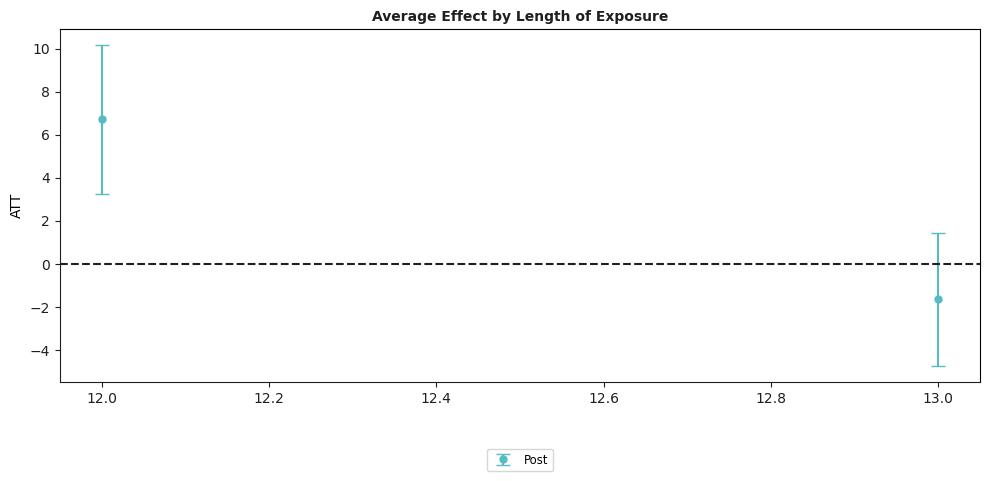

In [16]:
example_attgt.aggte("calendar")
example_attgt.plot_aggte();

In [20]:
dta = pd.read_stata("Data/Organized/us_nocat_twfe.dta")

